In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from matplotlib import cm
from scipy.linalg import issymmetric
import networkx as nx

from functions import *

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

This undirected network contains gift-givings (taro) between households in a Papuan village. A node represents a household and an edge between two households indicates that there happened a gift-giving.

In [2]:
RM = nx.read_weighted_edgelist('./networks/moreno_taro/out.moreno_taro_taro', 
                               comments='%', create_using=nx.DiGraph)

/tmp/ipykernel_21254/3168154972.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(RM); A = A.toarray()


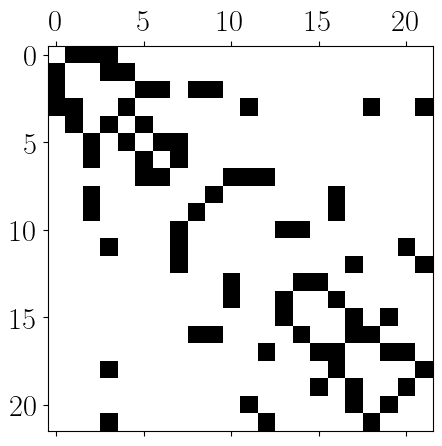

In [3]:
# retrieve adjacency matrix
A = nx.adjacency_matrix(RM); A = A.toarray()

# visualising
plt.figure(figsize=(5,5))
plt.spy(A)

In [4]:
# "unweight" network
for i in range(len(A)):
    for j in range(len(A)):
        if A[i,j] > 0:
            A[i,j] = 1
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 0 0

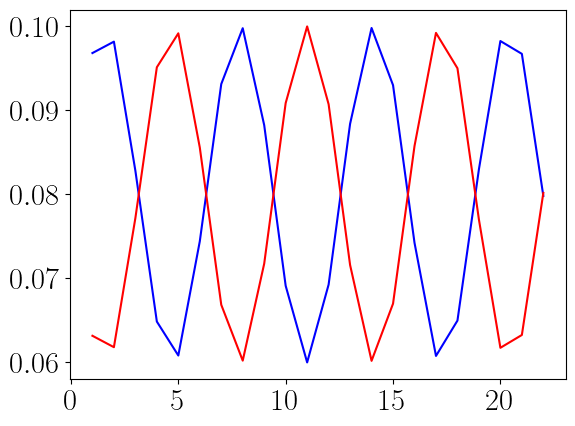

In [5]:
# Setup
nodes = np.arange(1,len(RM)+1)

# Brusselator parameters
#D = [1, 7]
#wave1 = 1 + 0.9*np.sin(nodes)
#wave2 = 2 - wave1

# Mimura-Murray parameters
#D = [1, 0.0125]
#wave1 = np.maximum(5, 10 - np.abs(nodes - len(RM)/2))
#wave2 = wave1 + 5

# Fitzhugh-Nagumo parameters
D = [0.2, 15]
wave1 = 0.08 + 0.02*np.sin(nodes)
wave2 = 0.16 - wave1

init = np.hstack(( wave1, wave2 ))
tspan = np.arange(0,20,0.01)
plt.plot(nodes,wave1,'b')
plt.plot(nodes,wave2,'r')

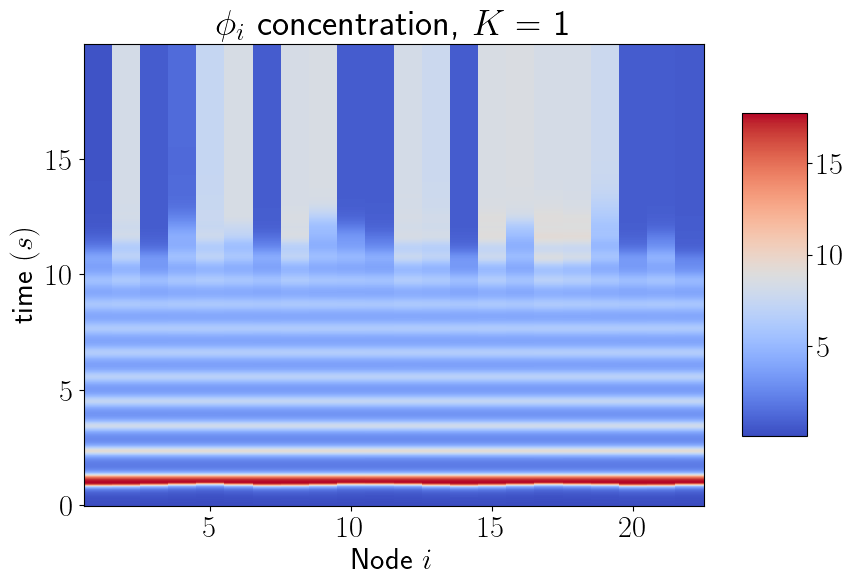

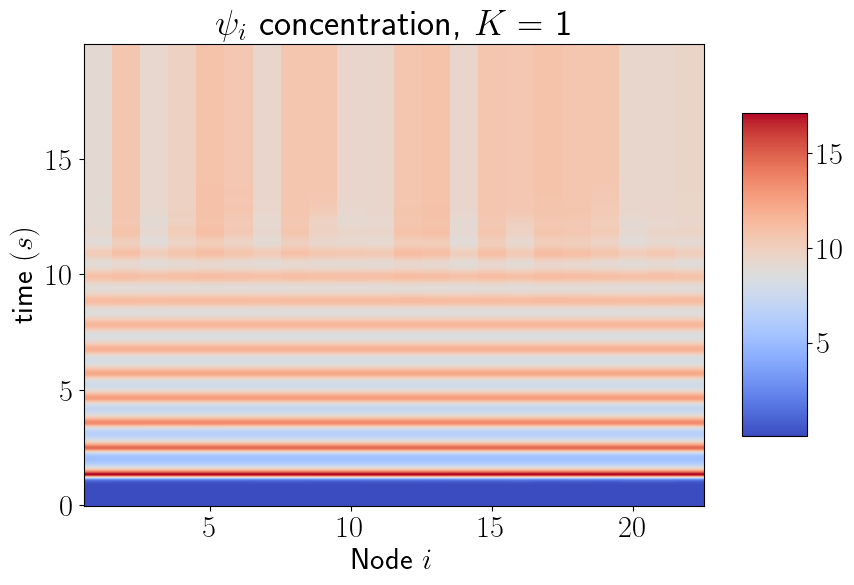

In [6]:
# simulating
sol = simulate_rdm(A, MimuraMurray, D, init, tspan, 0)

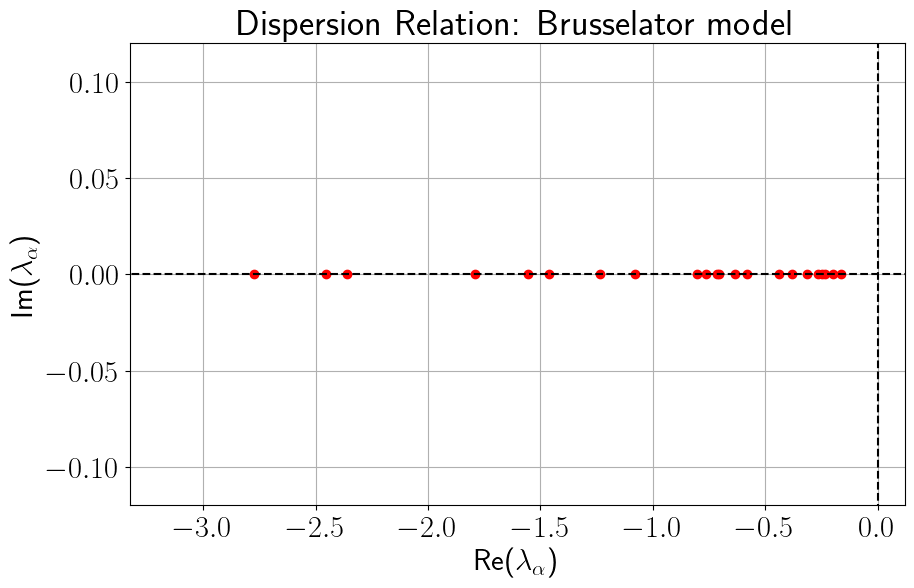

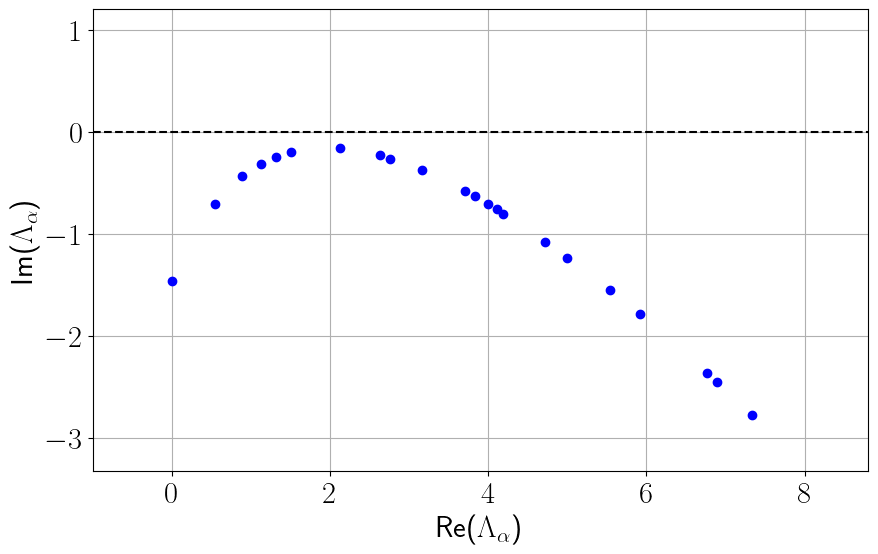

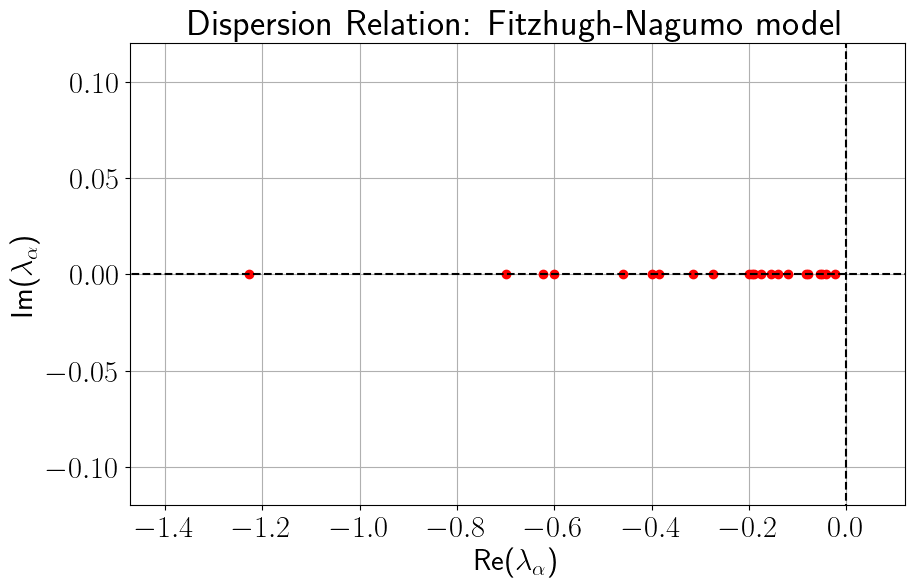

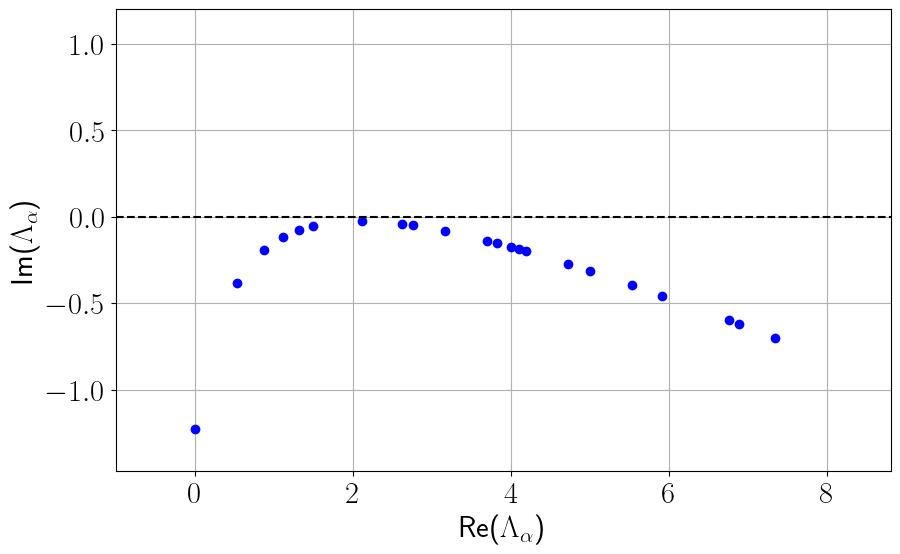

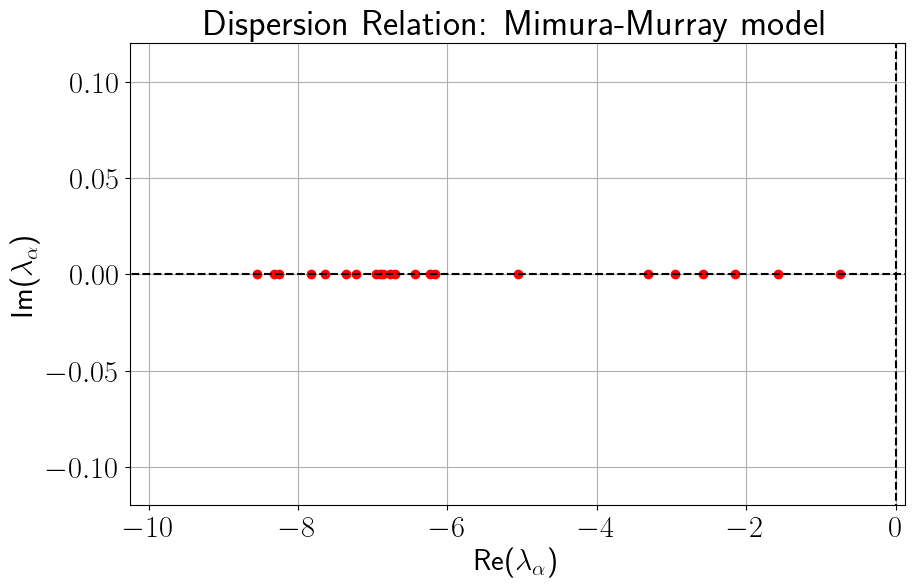

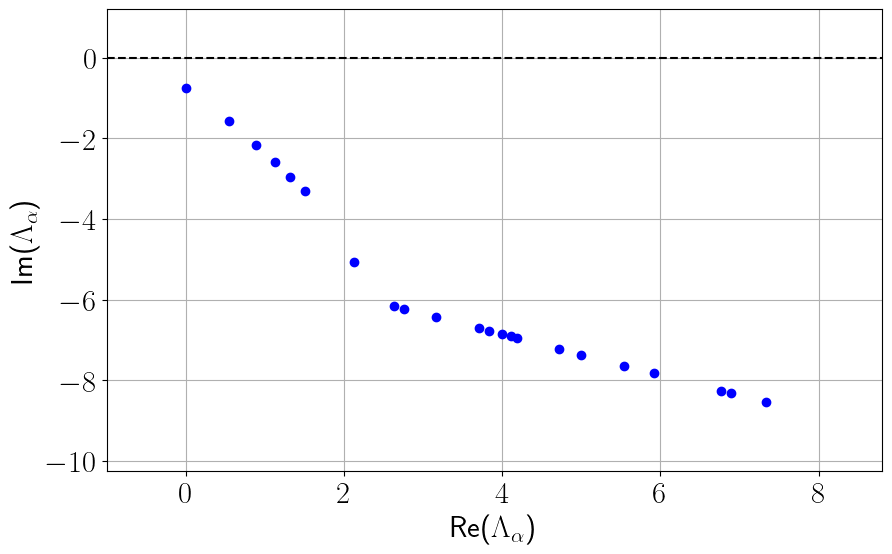

In [7]:
br = dispersion_relation(A,'Brusselator')
fn = dispersion_relation(A,'Fitzhugh-Nagumo')
mm = dispersion_relation(A,'Mimura-Murray')